# Making Maps using `Cartopy` 

`Cartopy` is a Python map plotting package.  Combined with `matplotlib` is works well for making contour plots of maps for Climate Data Analysis

This notebook will demonstrate how to make map contour plots using `Cartopy`, including:
1. some stuff
2. some more stuff

## Data

We return to our CMIP5 data for surface air temperature (tas) from the RCP8.5 scenario produced by the NCAR/CCSM4 model. For this example, we will again read the first ensemble member.

The data are located on the COLA severs in the following directory:
```/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r1i1p1/```

The filename is:
```tas_Amon_CCSM4_rcp45_r1i1p1_210101-229912.nc```

In [1]:
import warnings

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

Read Data

In [2]:
path='/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r1i1p1/'
fname='tas_Amon_CCSM4_rcp45_r1i1p1_200601-210012.nc'
ds=xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288, time: 1140)
Coordinates:
  * time       (time) object 2006-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                rcp45
    source:                       CCSM4
    model_id:                     CCSM4
    forcing:                      Sl GHG Vl SS Ds SA BC MD OC Oz AA
    parent_experiment_id:         historical
    parent_experiment_rip:        r1i1p1
    branch_time:                  2005.0
    contact:                      cesm_data@ucar.edu
    references:                   Gent P. R., et.al. 2011: The Community Clim...
    initialization_method:        1
    physics_version:              1
    tracking_id:                  0bf35136-b266-44d2-9078-f3081b83b6ad
    acknowledgements:             The CESM project is supported by the Nation...
    cesm_casename:                b40.rcp4_5.1deg.001
    cesm_repotag:                 ccsm4_0_beta49
    cesm_compset:                 BRCP45CN
    resolution:                   f09_g16 (0.9x1.25_gx1v6)
    forcing_note:                 Additional information on the external forc...
    processed_by:                 strandwg on mirage0 at 20111021
    processing_code_information:  Last Changed Rev: 428 Last Changed Date: 20...
    product:                      output
    experiment:                   RCP4.5
    frequency:                    mon
    creation_date:                2011-10-21T21:56:22Z
    history:                      2011-10-21T21:56:22Z CMOR rewrote data to c...
    Conventions:                  CF-1.4
    project_id:                   CMIP5
    table_id:                     Table Amon (26 July 2011) 976b7fd1d9e1be31d...
    title:                        CCSM4 model output prepared for CMIP5 RCP4.5
    parent_experiment:            historical
    modeling_realm:               atmos
    realization:                  1
    cmor_version:                 2.7.1

Let's take the mean temperature over the entire period for our plots

In [3]:
ds_mean=ds.mean(dim='time')

Previously, in the read-netcdf notebook, we just used plt.contour from `matplotlib`, like this:

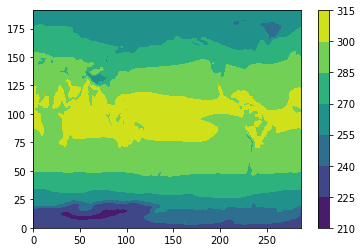

In [4]:
plt.contourf(ds_mean['tas'])
plt.colorbar()

## Plot with a map
However, we would like to plot this with map and control the map projection, label the lats and lons, etc.

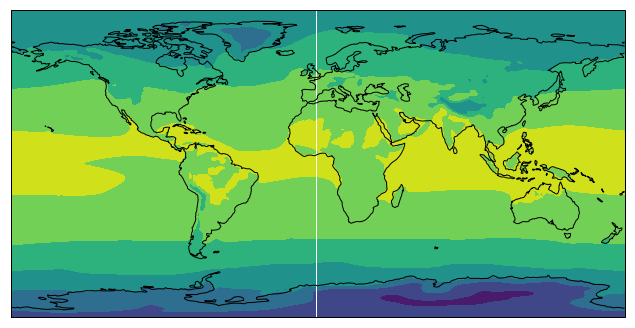

In [5]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
ax.contourf(ds['lon'], ds['lat'], ds_mean['tas'],
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

## Cyclic data and lat-lon labels

This figure has a couple of things we would like to change:
1. The stripe at 0 lon. This is due to the fact that `contourf` has no way to know that our data is cyclic in longitude.  We will fix this using `cartopy.util.add_cyclic_point`
2. No lat-lon labels. We will add lat-lon labels using `set_x(y)ticks` and `cticker`.

We set the lat-lon lables using `set_x(y)ticks` and `cticker`. We will fix the white strip using

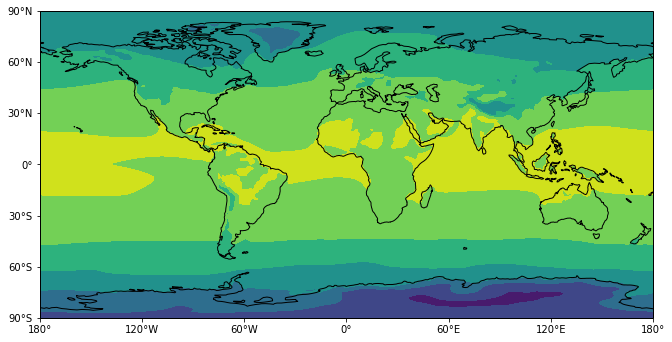

In [9]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

## Change the Colormap

The colors are not very nice for plotting temperature contours. Let's choose a different colormap and add a colorbar.  The [colormap options] https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html come from `matplotlib`.  I will choose one called `coolwarm`

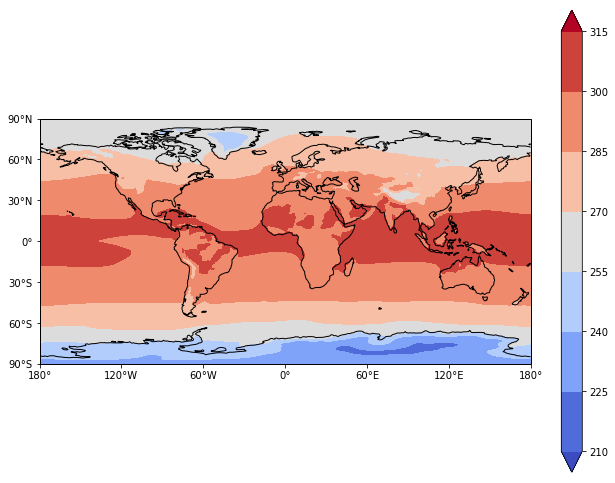

In [7]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs)

## Change the map projection

What if I want to use a different map projection? The various map projections can be found here https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

Text(0.5,1,'NCAR-CCSM4 RCP4.5 2100-2299')

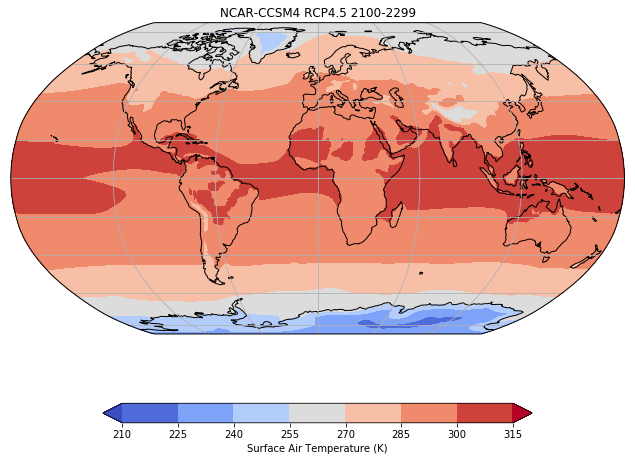

In [8]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (K)')

# Add title
plt.title('NCAR-CCSM4 RCP4.5 2100-2299')